## Lab Assignment: Advanced Data Visualization with Seaborn, Plotly, and MatPlotLib
Student:     Jeff McKendry

### Objective: To apply knowledge of more advanced data visualizations using some of the additional standard Python libraries.

### Instructions:
In this lab assignment, you will be given the following eight problems to solve. Each problem requires you to implement a solution using one of the named visualization libraries in Python. Read the problem statement carefully and make sure you understand the requirements before starting to code.
1. Load the dataset titanic.csv using Pandas
2. Create a bar plot using Seaborn to visualize the count of passengers in each passenger class (Pclass) in the Titanic dataset. Label the x-axis, y-axis, and add a title to the plot.
3. Use Plotly to create an interactive scatter plot to visualize the relationship between the age and fare paid by passengers in the Titanic dataset. Include tooltips that display additional information about each data point when hovering over them.
4. Create a histogram using Matplotlib to visualize the distribution of passenger ages in the Titanic dataset. Customize the bin size, color, and transparency of the bars.
5. Use Seaborn to create a box plot to compare the fare distribution across different passenger classes (Pclass) in the Titanic dataset. Add labels to the x-axis and y-axis, and include a legend to indicate the passenger classes.
6. Create a line plot using Plotly to display the survival rate of passengers based on their age in the Titanic dataset. Group the data by age range and calculate the survival rate for each group. Add a title and axis labels to the plot.
7. Use Matplotlib to create a stacked bar plot to visualize the survival count of passengers in different passenger classes (Pclass) and embarkation ports (Embarked) in the Titanic dataset. Customize the colors, add a legend, and include a title for the plot.
8. Create a heat map using Seaborn to visualize the correlation matrix of numerical variables in the Titanic dataset, such as age, fare, and number of siblings/spouses aboard (SibSp). Customize the color palette and add annotations to the cells to display the correlation values.

### Deliverable:
Modify this notebook to include the python code as well as any documentation related to your submission.  Submit the notebook as your response in Blackboard.

### Grading Criteria:

Your lab assignment will be graded based on the following criteria:

- Correctness of the implementation
- Proper use of basic control structures and functions
- Code efficiency
- Clarity and readability of the code
- Compliance with the instructions and deliverables.

### Student Submission

In [1]:
#Load the titanic dataset
import seaborn as sns

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')
titanic.count()
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


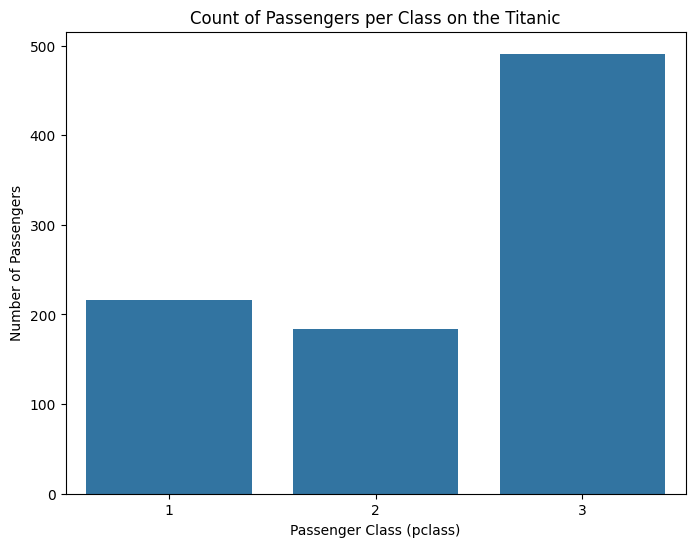

In [5]:
#Create a bar plot using Seaborn to visualize the count of passengers in each passenger class
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

plt.figure(figsize=(8,6))
sns.countplot(data=titanic, x='pclass')
plt.xlabel('Passenger Class (pclass)')
plt.ylabel('Number of Passengers')
plt.title('Count of Passengers per Class on the Titanic')
plt.show()

In [12]:
#Interactive Scatter Plot: Age vs Fare using Plotly

# Handle missing values in 'age' and 'fare'
scatter_df = titanic.dropna(subset=['age', 'fare'])

fig_scatter = px.scatter(
    scatter_df,
    x='age',
    y='fare',
    color='pclass',
    hover_data=['age', 'sex', 'embarked','survived'],
    title='Relationship between Age and Fare Paid by Titanic Passengers',
    labels={
        'age': 'age',
        'fare': 'fare paid',
        'pclass': 'Passenger Class'
    }
)

fig_scatter.show()


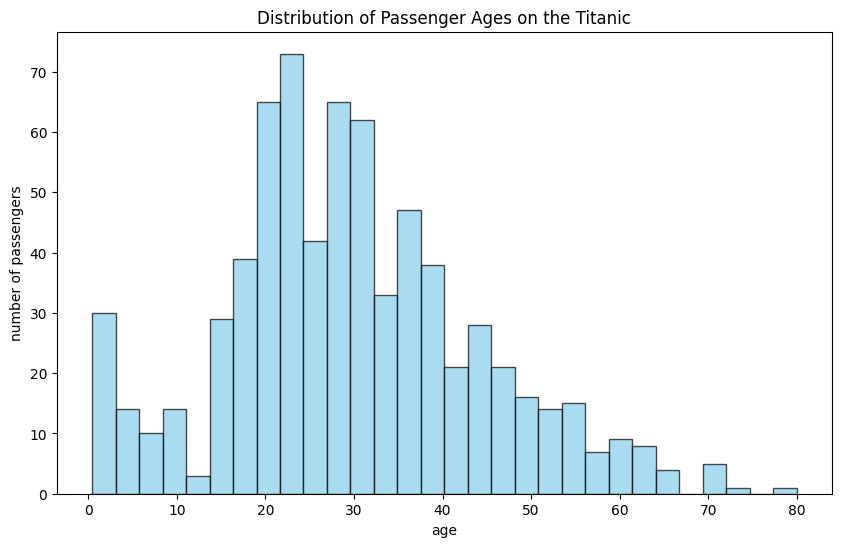

In [13]:
#Histogram: Distribution of passenger ages using Matplotlib

plt.figure(figsize=(10,6))
bins = 30  # Customize bin size
plt.hist(titanic['age'].dropna(), bins=bins, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('age')
plt.ylabel('number of passengers')
plt.title('Distribution of Passenger Ages on the Titanic')
plt.show()


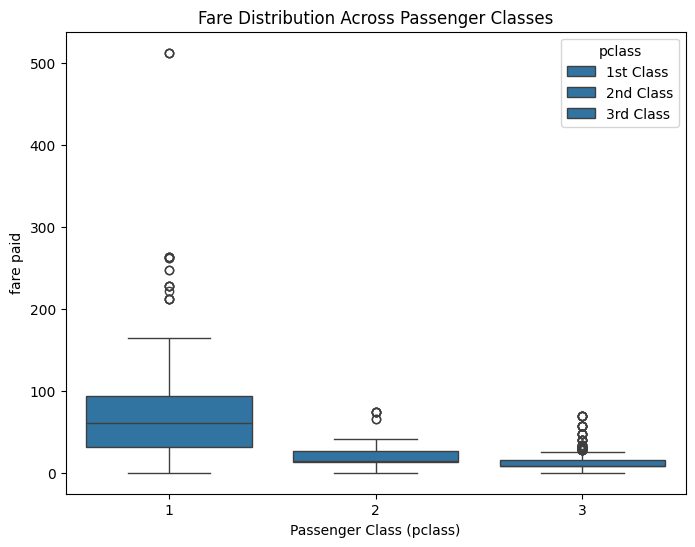

In [16]:
#Box Plot: Fare distribution across different passenger classes (pclass) using Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic, x='pclass', y='fare')
plt.xlabel('Passenger Class (pclass)')
plt.ylabel('fare paid')
plt.title('Fare Distribution Across Passenger Classes')
plt.legend(title='pclass', labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

In [20]:
#Line Plot: Survival rate based on age using Plotly
#Define age bins

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic['AgeGroup'] = pd.cut(titanic['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate survival rate per age group
survival_rate = titanic.groupby('AgeGroup')['survived'].mean().reset_index()
survival_rate['survived'] = survival_rate['survived'] * 100  # Convert to percentage

fig_line = px.line(
    survival_rate,
    x='AgeGroup',
    y='survived',
    markers=True,
    title='Survival Rate by Age Group on the Titanic',
    labels={
        'AgeGroup': 'Age Group',
        'survived': 'Survival Rate (%)'
    }
)

fig_line.show()

C:\Users\Jeffm\AppData\Local\Temp\ipykernel_12624\3953274799.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



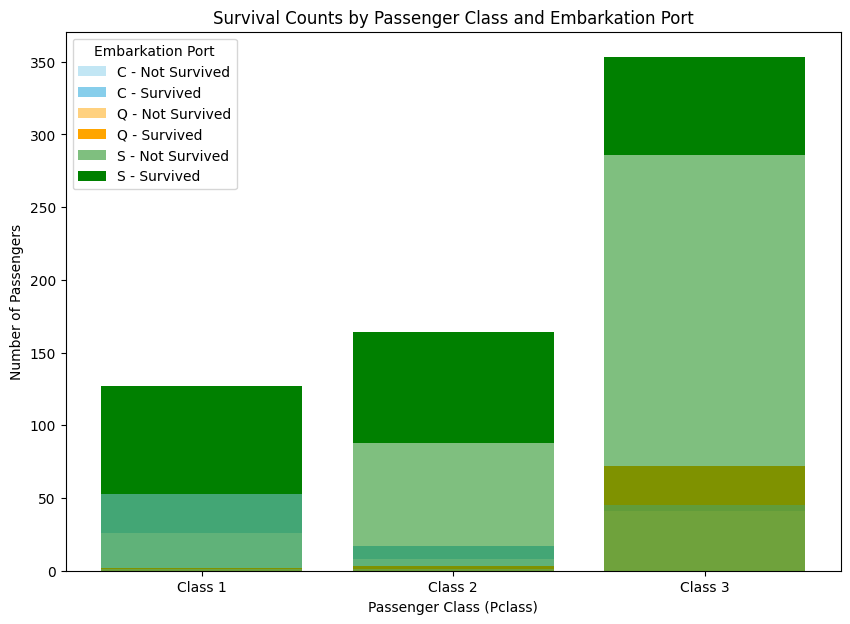

In [24]:
#Use Matplotlib to create a stacked bar plot to visualize the survival count of passengers in different passenger classes

#Handle missing values in 'Embarked' column
df = titanic.dropna(subset=['embarked'])

# Initialize bar data
pclasses = sorted(df['pclass'].unique())
embarked_ports = sorted(df['embarked'].unique())

survived_counts = {port: [] for port in embarked_ports}
not_survived_counts = {port: [] for port in embarked_ports}

#Collect counts
for pclass in pclasses:
    for port in embarked_ports:
        survived = len(df[(df['pclass'] == pclass) & (df['embarked'] == port) & (df['survived'] == 1)])
        not_survived = len(df[(df['pclass'] == pclass) & (df['embarked'] == port) & (df['survived'] == 0)])
        survived_counts[port].append(survived)
        not_survived_counts[port].append(not_survived)

#Plot
x = range(len(pclasses))
plt.figure(figsize=(10, 7))

for port, color in zip(embarked_ports, ['skyblue', 'orange', 'green']):
    plt.bar(x, not_survived_counts[port], label=f'{port} - Not Survived', color=color, alpha=0.5)
    plt.bar(x, survived_counts[port], bottom=not_survived_counts[port], label=f'{port} - Survived', color=color)

#Customize the colors, add a legend, and include a title for the plot.
plt.xticks(ticks=x, labels=[f'Class {p}' for p in pclasses])
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Number of Passengers')
plt.title('Survival Counts by Passenger Class and Embarkation Port')
plt.legend(title='Embarkation Port')
plt.show()



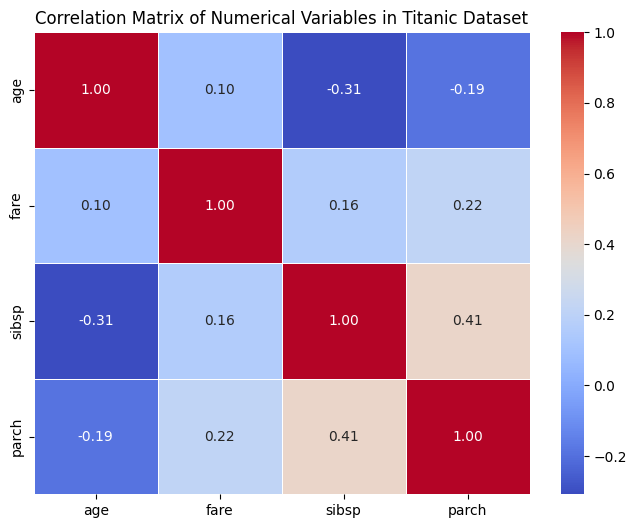

In [26]:
#Create a heat map using Seaborn
numerical_cols = ['age', 'fare', 'sibsp', 'parch']

# Compute correlation matrix
corr_matrix = titanic[numerical_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Matrix of Numerical Variables in Titanic Dataset')
plt.show()
